# Carte des cours d'eau français

Ce notebook a pour but de créer une carte des cours d'eau de France métropolitaine en distinguant les différents bassins hydrographiques.

Les données sont contenues dans un fichier gpkg provenant du site https://geo.data.gouv.fr/

Chaque bassin hydrographique est repéré par un numéro :

- 01 : Artois-Picardie
- 02 : Rhin-Meuse
- 03 : Seine-Normandie
- 04 : Loire-Bretagne
- 05 : Adour-Garonne
- 06 : Rhône-Méditerranée
- 12 : Corse

Dans le jeu de données, chaque cours d'eau possède un identifiant (CdOH) dont les deux premiers caractères correspondent au bassin hydrographique auquel il appartient.

## Importation des données

In [1]:
import geopandas as gpd

cours = gpd.read_file('courseau-fxx.gpkg')

In [2]:
cours.head()

,gid,CdOH,TopoOH,SourceNomOH,DateCreationOH,StatutOH,InfluenceMareeOH,CommentaireOH,ProjCoordOH,geometry
0,27292,04C0000002000806088,Ruisseau de Saint-Marcel,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((805011.000 6497687.100, 8050..."
1,27293,04C0000002000806147,NaN,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((803023.700 6515277.700, 8030..."
2,27294,04C0000002000806188,Ruisseau le Gourny,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((806155.800 6493968.800, 8061..."
3,27295,04C0000002000806085,Ruisseau le Vérut,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((804920.800 6503339.400, 8048..."
4,27296,04C0000002000806283,NaN,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((804792.300 6492503.800, 8047..."


In [3]:
cours.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126544 entries, 0 to 126543
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   gid               126544 non-null  int64              
 1   CdOH              126544 non-null  object             
 2   TopoOH            73471 non-null   object             
 3   SourceNomOH       15076 non-null   object             
 4   DateCreationOH    126544 non-null  datetime64[ns, UTC]
 5   StatutOH          126270 non-null  object             
 6   InfluenceMareeOH  0 non-null       float64            
 7   CommentaireOH     0 non-null       float64            
 8   ProjCoordOH       126544 non-null  object             
 9   geometry          126544 non-null  geometry           
dtypes: datetime64[ns, UTC](1), float64(2), geometry(1), int64(1), object(5)
memory usage: 9.7+ MB


Les seules variables qui me seront utiles (geometry, CdOH) ne possèdent pas de valeurs manquantes.

## Extraction du bassin hydrographique

In [4]:
#Extraction des deux premiers caractères de CdOH pour création de la variable bassin
cours['bassin'] = cours['CdOH'].str.extract('(^.{2})')
cours.head()

,gid,CdOH,TopoOH,SourceNomOH,DateCreationOH,StatutOH,InfluenceMareeOH,CommentaireOH,ProjCoordOH,geometry,bassin
0,27292,04C0000002000806088,Ruisseau de Saint-Marcel,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((805011.000 6497687.100, 8050...",04
1,27293,04C0000002000806147,NaN,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((803023.700 6515277.700, 8030...",04
2,27294,04C0000002000806188,Ruisseau le Gourny,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((806155.800 6493968.800, 8061...",04
3,27295,04C0000002000806085,Ruisseau le Vérut,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((804920.800 6503339.400, 8048...",04
4,27296,04C0000002000806283,NaN,NaN,2017-01-24 16:06:18+00:00,Validé,NaN,NaN,26,"MULTILINESTRING ((804792.300 6492503.800, 8047...",04


## Création de la carte

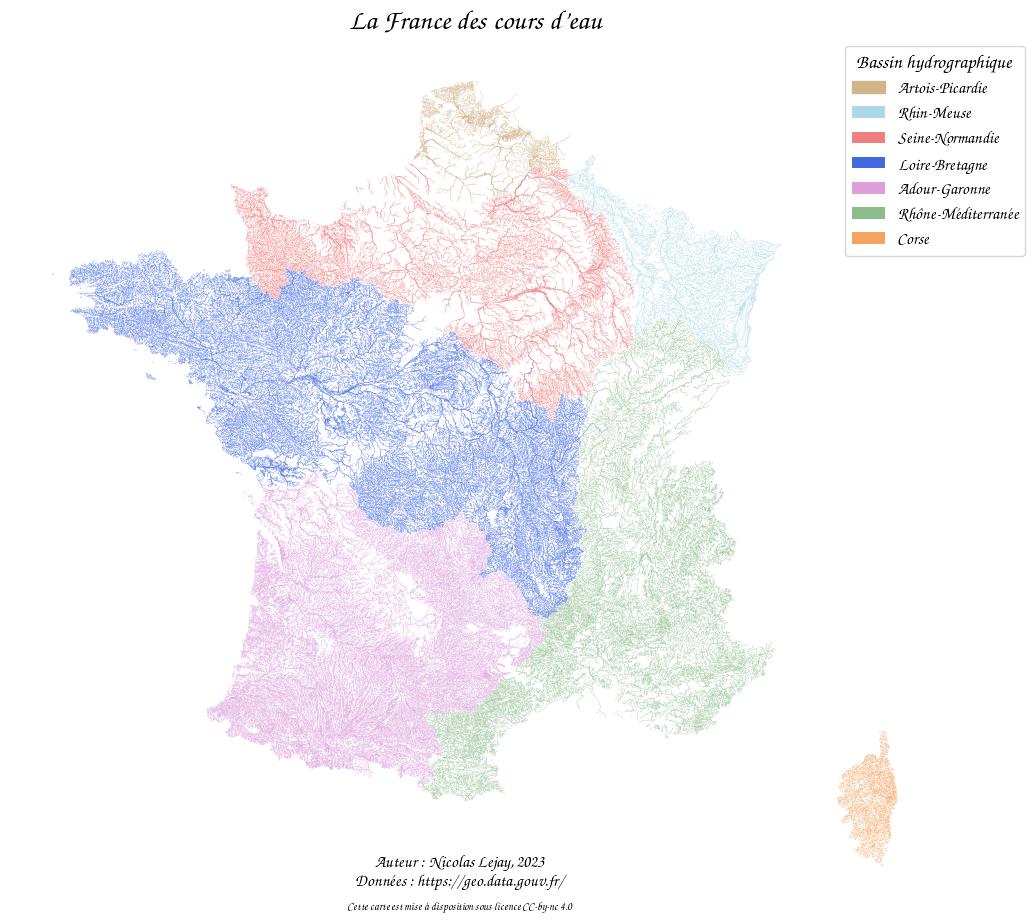

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

#sélection des couleurs suivant le bassin hydrographique
conditions = [cours['bassin']=='01', cours['bassin']=='02', cours['bassin']=='03', cours['bassin']=='04', cours['bassin']=='05', cours['bassin']=='06', cours['bassin']=='12',cours['bassin']=='99']
couleurs = ['tan', 'lightblue', 'lightcoral', 'royalblue', 'plum', 'darkseagreen', 'sandybrown', 'white']
c_select = np.select(conditions, couleurs)

lg = mpatches.Patch(color='tan', label='Artois-Picardie')
lb = mpatches.Patch(facecolor='lightblue', label='Rhin-Meuse')
lc = mpatches.Patch(facecolor='lightcoral', label='Seine-Normandie')
rb = mpatches.Patch(facecolor='royalblue', label='Loire-Bretagne')
pl = mpatches.Patch(facecolor='plum', label='Adour-Garonne')
dsg = mpatches.Patch(facecolor='darkseagreen', label='Rhône-Méditerranée')
sb = mpatches.Patch(facecolor='sandybrown', label='Corse')

# Changement de police de matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cursive",
    "font.cursive": "Tex Gyre Chorus"
})

#Création de la carte
fig,ax = plt.subplots(figsize=(12,12))
cours.plot(linewidth=0.2, color=c_select, legend=True, ax=ax)
plt.title("La France des cours d'eau", fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(title = 'Bassin hydrographique', handles=[lg, lb, lc, rb, pl, dsg, sb], bbox_to_anchor=(1.1,1), fontsize=12, title_fontsize=14)
plt.figtext(0.5, 0.15, "Auteur : Nicolas Lejay, 2023\n Données : https://geo.data.gouv.fr/", fontsize=12, ha="center")
plt.figtext(0.5, 0.13, "Cette carte est mise à disposition sous licence CC-by-nc 4.0", fontsize=8, ha="center")
ax.axis('off')

carte=plt.gcf()
carte.savefig('carte_cours_eau.jpg', bbox_inches='tight', dpi=200)
plt.show()